In [ ]:
# Listing 4.1 Example using Scikit-learn for a classification problem

import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

X, y = make_classification(
    n_features=32, n_redundant=0, n_informative=24, random_state=1, n_clusters_per_class=1
) #A

model = LogisticRegression() #B

pipeline = Pipeline(
    [('processing', StandardScaler()),
     ('modeling', model)]) #C

cv_scores = cross_validate(estimator=pipeline,
                           X=X,
                           y=y,
                           scoring="accuracy",
                           cv=5) #D

mean_cv = np.mean(cv_scores['test_score'])
std_cv = np.std(cv_scores['test_score'])
print(f"accuracy: {mean_cv:0.3f} ({std_cv:0.3f})")

model.fit(X, y) #E

#A a function for creating a classification problem with a balanced target
#B a logistic regression model
#C a pipeline sequentially putting together some data processing and our model
#D a cross-validation score test to evaluate how accurate the model is on our data
#E the logistic regression model is trained on all the available data

accuracy: 0.900 (0.032)


LogisticRegression()

In [ ]:
# 4.1.2 Common Scikit-learn interface
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0)
X = [[-1, -1], [-2, -1], [1, 1], [2, 1]]
y = [1, 1, 0, 0]
model.fit(X, y)

LogisticRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler
processing = StandardScaler().fit(X)

In [ ]:
X_test = [[-1, 1], [2, -1]]
model.predict(X_test)

array([1, 0])

In [ ]:
model.predict_proba(X_test)

array([[0.45001898, 0.54998102],
       [0.73081591, 0.26918409]])

In [ ]:
processing.transform(X)

array([[-0.63245553, -1.        ],
       [-1.26491106, -1.        ],
       [ 0.63245553,  1.        ],
       [ 1.26491106,  1.        ]])

In [ ]:
processing.fit_transform(X)

array([[-0.63245553, -1.        ],
       [-1.26491106, -1.        ],
       [ 0.63245553,  1.        ],
       [ 1.26491106,  1.        ]])

In [ ]:
# Loading Airbnb NY Dataset

import pandas as pd

url = "https://raw.githubusercontent.com/lmassaron/tabular_datasets/master/AB_NYC_2019.csv"
data = pd.read_csv(url)

In [ ]:
# 4.2.1 Dataset exploration

import numpy as np
import pandas as pd

excluding_list = ['price', 'id', 'latitude', 'longitude', 'host_id', 'last_review',
                  'name', 'host_name']
categorical = ['neighbourhood_group', 'neighbourhood', 'room_type']
continuous = ['minimum_nights', 'number_of_reviews', 'reviews_per_month',
              'calculated_host_listings_count']

In [ ]:
data.shape

(48895, 16)

In [ ]:
data[categorical].nunique()

neighbourhood_group      5
neighbourhood          221
room_type                3
dtype: int64

In [ ]:
low_card_categorical = ['neighbourhood_group', 'room_type']
high_card_categorical = ['neighbourhood']

In [ ]:
data[low_card_categorical + continuous].isna().sum()

neighbourhood_group                   0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
dtype: int64

In [ ]:
data.reviews_per_month.min()

0.01

array([[<Axes: title={'center': 'price'}>]], dtype=object)

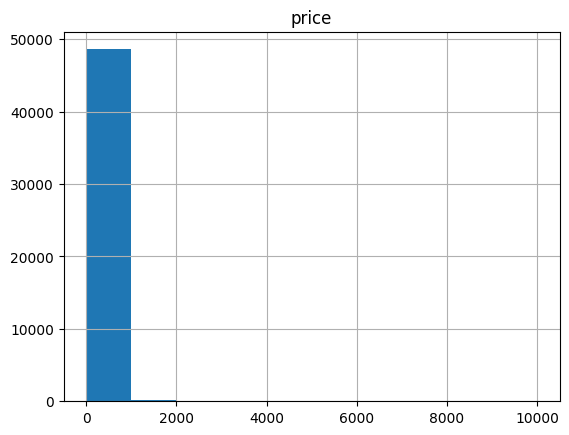

In [ ]:
data[["price"]].hist(bins=10)

<Axes: >

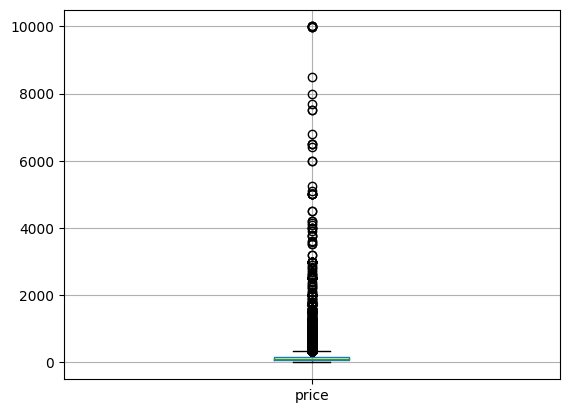

In [ ]:
data[["price"]].boxplot()

<Axes: >

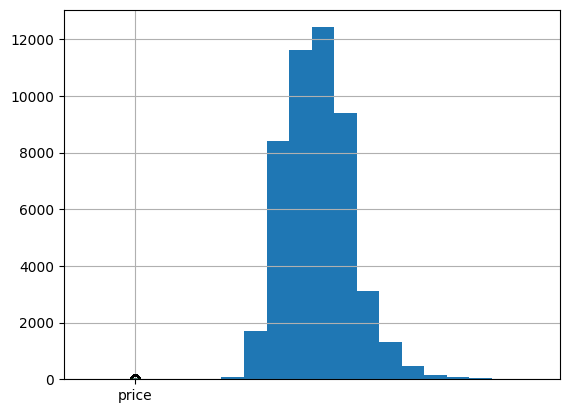

In [ ]:
np.log1p(data["price"]).hist(bins=20)
data[["price"]].apply(lambda x: np.log1p(x)).boxplot()

array([[<Axes: title={'center': 'price'}>]], dtype=object)

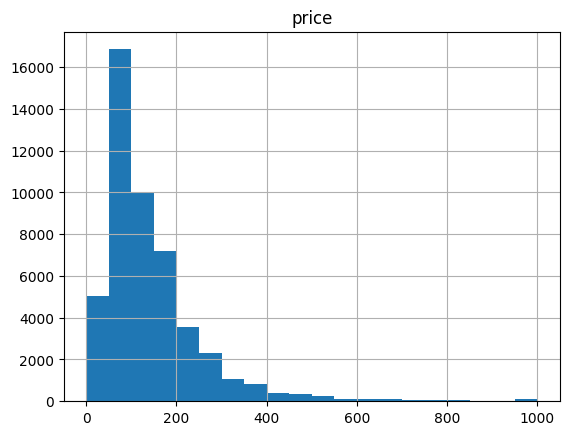

In [ ]:
data[["price"]][data.price <= 1000].hist(bins=20)

array([[<Axes: title={'center': 'price'}>]], dtype=object)

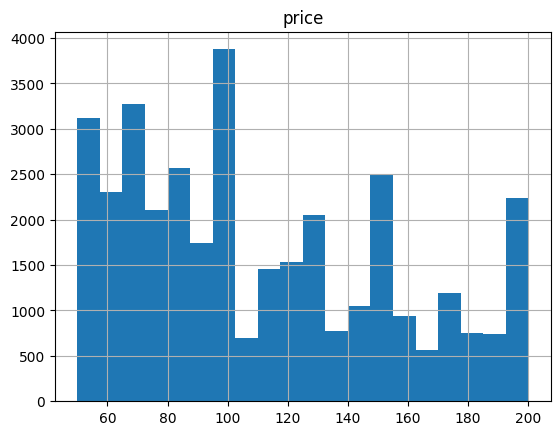

In [ ]:
data[["price"]][(data.price >= 50) & (data.price <= 200)].hist(bins=20)

In [ ]:
price_capped = data.price <= 1000
price_window = (data.price >= 50) & (data.price <= 200)

<Axes: >

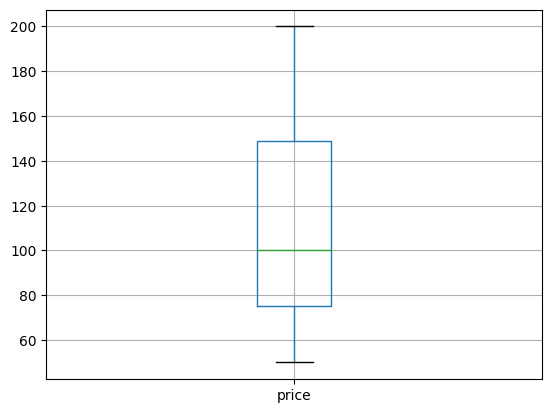

In [ ]:
data[["price"]][price_window].boxplot()

In [ ]:
target_mean = (data["price"] > data["price"].mean()).astype(int)
target_median = (data["price"] > data["price"].median()).astype(int)
target_multiclass = pd.qcut(data["price"], q=5, labels=False)
target_regression = data["price"]

In [ ]:
target_median.value_counts()

0    24472
1    24423
Name: price, dtype: int64

In [ ]:
target_mean.value_counts()

0    34016
1    14879
Name: price, dtype: int64

In [ ]:
target_multiclass.value_counts()

3    10809
0    10063
1     9835
2     9804
4     8384
Name: price, dtype: int64

In [ ]:
# Listing 4.2 setting up building blocks for tabular learning pipelines

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

categorical_onehot_encoding = OneHotEncoder(handle_unknown='ignore') #A
numeric_passthrough = SimpleImputer(strategy="constant", fill_value=0) #B
numeric_standardization = Pipeline([
       ("imputation", SimpleImputer(strategy="constant", fill_value=0)),
       ("standardizing", StandardScaler())
       ]) #C

#A binarizes all categorical features based on their unique labels
#B replaces missing numeric values with zero
#C replaces missing numeric values with zero and then it standardizes the features

In [ ]:
column_transform = ColumnTransformer(
    [('categories', categorical_onehot_encoding, low_card_categorical), #A
     ('numeric', numeric_passthrough, continuous), #B
    ],
    remainder='drop', #C
    verbose_feature_names_out=False, #D
    sparse_threshold=0.0 #E
)

#A first step of the pipeline, one-hot encoding categorical features
#B second step of the pipeline,handling numeric features
#C the features not processed by the pipeline are dropped from the result
#D names of the features are kept as they originally are
#E the result is always a dense matrix, i.e. a NumPy array

In [ ]:
X = column_transform.fit_transform(data)
print(type(X), X.dtype, X.shape)

<class 'numpy.ndarray'> float64 (48895, 12)


In [ ]:
# Listing 4.3 Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

column_transform = ColumnTransformer(
    [('categories', categorical_onehot_encoding, low_card_categorical),
     ('numeric', numeric_passthrough, continuous)],
    remainder='drop',
    verbose_feature_names_out=False,
    sparse_threshold=0.0) #A

model = LinearRegression() #B

model_pipeline = Pipeline(
    [('processing', column_transform),
     ('modeling', model)] #C
)

cv = KFold(5, shuffle=True, random_state=0) #D
rmse =  make_scorer(mean_squared_error, squared=False) #E

cv_scores = cross_validate(estimator=model_pipeline,
                           X=data[price_window],
                           y=target_regression[price_window],
                           scoring=rmse,
                           cv=cv,
                           return_train_score=True,
                           return_estimator=True) #F

mean_cv = np.mean(cv_scores['test_score'])
std_cv = np.std(cv_scores['test_score'])
fit_time = np.mean(cv_scores['fit_time'])
score_time = np.mean(cv_scores['score_time'])
print(f"{mean_cv:0.3f} ({std_cv:0.3f})",
      f"fit: {fit_time:0.2f} secs pred: {score_time:0.2f} secs")#G


#A ColumnTransformer, transforming data into numeric features and imputing missing data
#B vanilla  linear regression model
#C pipeline assembling ColumnTransformer and model together
#D cross validation strategy based on 5 folds and random sampling
#E function for evaluation metric derived from mean squared error
#F automated cross validate procedure
#G reporting the results in terms of metric, its standard deviation, fitting and prediction time

34.120 (0.300) fit: 0.07 secs pred: 0.02 secs


In [ ]:
# Listing 4.4 Customized data preparation for linear regression

data_2 = data[[]].copy() #A
data_2['neighbourhood_group_Manhattan'] = (
   (data['neighbourhood_group']=='Manhattan').astype(int)) #B
data_2['neighbourhood_group_Queens'] = (data['neighbourhood_group']=='Queens').astype(int)
data_2['room_type_Entire home/apt'] = (data['room_type']=='Entire home/apt').astype(int)
data_2['minimum_nights_log'] = np.log1p(data["minimum_nights"]) #C
data_2['number_of_reviews_log'] = np.log1p(data["number_of_reviews"])
data_2['neighbourhood_group_Manhattan*room_type_Entire home/apt'] = (
   data_2['neighbourhood_group_Manhattan'] * data_2['room_type_Entire home/apt']) #D
data_2['availability_365*neighbourhood_group_Manhattan'] = (data['availability_365'] *
   data_2['neighbourhood_group_Manhattan'])
data_2['availability_365*room_type_Entire home/apt'] = (data['availability_365'] *
   data_2['room_type_Entire home/apt'])

rmse = make_scorer(mean_squared_error, squared=False)
cv = KFold(5, shuffle=True, random_state=0)

cv_scores = cross_validate(estimator=LinearRegression(),
                           X=data_2[price_window],
                           y=target_regression[price_window],
                           scoring=rmse,
                           cv=cv,
                           return_train_score=True,
                           return_estimator=True)

mean_cv = np.mean(cv_scores['test_score'])
std_cv = np.std(cv_scores['test_score'])
print(f"{mean_cv:0.5f}, {std_cv:0.5f}")


#A copy of our original data we can safely modify
#B a new feature created by selection
#C a new feature created by transformation
#D a new feature created by interaction between two features

33.93737, 0.23999


In [ ]:
# Listing 4.5 L2 regularized linear regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

column_transform = ColumnTransformer(
    [('categories', categorical_onehot_encoding, low_card_categorical),
     ('numeric', numeric_passthrough, continuous)],
    remainder='drop',
    verbose_feature_names_out=False,
    sparse_threshold=0.0)

polynomial_expansion = PolynomialFeatures(degree=2) #A

model = Ridge(alpha=2500.0) #B

model_pipeline = Pipeline(
    [('processing', column_transform),
     ('polynomial_expansion', polynomial_expansion),
     ('standardizing', numeric_standardization),
     ('modeling', model)]
)

cv = KFold(5, shuffle=True, random_state=0)
rmse =  make_scorer(mean_squared_error, squared=False)

cv_scores = cross_validate(estimator=model_pipeline,
                           X=data[price_window],
                           y=target_regression[price_window],
                           scoring=rmse,
                           cv=cv,
                           return_train_score=True,
                           return_estimator=True)

mean_cv = np.mean(cv_scores['test_score'])
std_cv = np.std(cv_scores['test_score'])
fit_time = np.mean(cv_scores['fit_time'])
score_time = np.mean(cv_scores['score_time'])
print(f"{mean_cv:0.3f} ({std_cv:0.3f})",
      f"fit: {fit_time:0.2f} secs pred: {score_time:0.2f} secs")

#A polynomial expansion resulting in squared features and features’ cross-multiplication
#B alpha directly regulates the regularization, a higher value results in higher penalties

33.936 (0.288) fit: 0.22 secs pred: 0.05 secs


In [ ]:
# Listing 4.6 L1 regularized linear regression

model = Lasso(alpha=0.1) #A

model_pipeline = Pipeline(
    [('processing', column_transform),
     ('polynomial_expansion', polynomial_expansion),
     ('standardizing', numeric_standardization),
     ('modeling', model)]
)

cv = KFold(5, shuffle=True, random_state=0)
rmse =  make_scorer(mean_squared_error, squared=False)

cv_scores = cross_validate(estimator=model_pipeline,
                           X=data[price_window],
                           y=target_regression[price_window],
                           scoring=rmse,
                           cv=cv,
                           return_train_score=True,
                           return_estimator=True)

mean_cv = np.mean(cv_scores['test_score'])
std_cv = np.std(cv_scores['test_score'])
fit_time = np.mean(cv_scores['fit_time'])
score_time = np.mean(cv_scores['score_time'])
print(f"{mean_cv:0.3f} ({std_cv:0.3f})",
      f"fit: {fit_time:0.2f} secs pred: {score_time:0.2f} secs")

#A alpha directly regulates the regularization, a higher value results in higher penalties and more coefficients to zero

33.913 (0.283) fit: 1.71 secs pred: 0.06 secs


In [ ]:
# Listing 4.7 Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

accuracy = make_scorer(accuracy_score)
cv = KFold(5, shuffle=True, random_state=0)
model = LogisticRegression(solver="saga", penalty=None, max_iter=1_000) #A

column_transform = ColumnTransformer(
    [('categories', categorical_onehot_encoding, low_card_categorical),
     ('numeric', numeric_standardization, continuous)],
    remainder='drop',
    verbose_feature_names_out=False,
    sparse_threshold=0.0)

model_pipeline = Pipeline(
    [('processing', column_transform),
     ('modeling', model)]
)

cv_scores = cross_validate(estimator=model_pipeline,
                           X=data,
                           y=target_median,
                           scoring=accuracy,
                           cv=cv,
                           return_train_score=True,
                           return_estimator=True)

mean_cv = np.mean(cv_scores['test_score'])
std_cv = np.std(cv_scores['test_score'])
fit_time = np.mean(cv_scores['fit_time'])
score_time = np.mean(cv_scores['score_time'])
print(f"{mean_cv:0.3f} ({std_cv:0.3f})",
      f"fit: {fit_time:0.2f} secs pred: {score_time:0.2f} secs")

#A vanilla logistic regression without any penalty

0.820 (0.005) fit: 2.65 secs pred: 0.01 secs


In [ ]:
# Listing 4.8 L2 regularized multiclass linear regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

accuracy = make_scorer(accuracy_score)
cv = KFold(5, shuffle=True, random_state=0)
model = LogisticRegression(penalty="l2", C=0.1, solver="sag", multi_class="ovr", max_iter=1_000) #A

column_transform = ColumnTransformer(
    [('categories', categorical_onehot_encoding, low_card_categorical),
     ('numeric', numeric_standardization, continuous)],
    remainder='drop',
    verbose_feature_names_out=False,
    sparse_threshold=0.0)

model_pipeline = Pipeline(
    [('processing', column_transform),
     ('modeling', model)]
)

cv_scores = cross_validate(estimator=model_pipeline,
                           X=data,
                           y=target_multiclass,
                           scoring=accuracy,
                           cv=cv,
                           return_train_score=True,
                           return_estimator=True)

mean_cv = np.mean(cv_scores['test_score'])
std_cv = np.std(cv_scores['test_score'])
fit_time = np.mean(cv_scores['fit_time'])
score_time = np.mean(cv_scores['score_time'])
print(f"{mean_cv:0.3f} ({std_cv:0.3f})",
      f"fit: {fit_time:0.2f} secs pred: {score_time:0.2f} secs")

#A multi_class sets the one versus rest multiclass strategy

0.425 (0.002) fit: 31.20 secs pred: 0.02 secs


In [ ]:
# Listing 4.9 Tweedie regression

from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

experiments = [
    ['normal', 0],
    ['poisson', 1],
    ['tweedie', 1.5],
    ['gamma', 2],
    ['inverse gaussian', 3]
] #A

for experiment, power in experiments:

    column_transform = ColumnTransformer(
        [('categories', categorical_onehot_encoding, low_card_categorical),
         ('numeric', numeric_standardization, continuous)],
        remainder='drop',
        verbose_feature_names_out=False,
        sparse_threshold=0.0)

    model = TweedieRegressor(power=power, max_iter=1_000)

    model_pipeline = Pipeline(
        [('processing', column_transform),
         ('modeling', model)]
    )

    cv = KFold(5, shuffle=True, random_state=0)
    rmse =  make_scorer(mean_squared_error, squared=False)

    cv_scores = cross_validate(estimator=model_pipeline,
                               X=data,
                               y=target_regression + 0.1,#B
                               scoring=rmse,
                               cv=cv,
                               return_train_score=True,
                               return_estimator=True)

    mean_cv = np.mean(cv_scores['test_score'])
    std_cv = np.std(cv_scores['test_score'])
    fit_time = np.mean(cv_scores['fit_time'])
    score_time = np.mean(cv_scores['score_time'])
    print(f"{experiment:18}: {mean_cv:0.3f} ({std_cv:0.3f})",
          f"fit: {fit_time:0.2f} secs pred: {score_time:0.2f} secs")


#A the power parameter can take any values between 1 and 2
#B tweedie, gamma and inverse gaussian distributions can only work with target values > 0

normal            : 233.858 (15.826) fit: 0.23 secs pred: 0.02 secs
poisson           : 229.189 (16.075) fit: 0.56 secs pred: 0.03 secs
tweedie           : 229.607 (16.047) fit: 0.34 secs pred: 0.02 secs
gamma             : 233.991 (15.828) fit: 0.22 secs pred: 0.03 secs
inverse gaussian  : 239.577 (15.453) fit: 0.14 secs pred: 0.02 secs


In [ ]:
# Listing 4.10 Out-of-core Logistic regression with L2 regularization

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import gen_batches
from sklearn.metrics import accuracy_score

def generate_batches(X, y, batch_size, random_state): #A
    """split dataset into batches """
    examples = len(X)
    batches = gen_batches(n=examples, batch_size=batch_size) #B
    sequence = np.arange(examples)
    if random_state:
      np.random.seed(random_state) #C
      np.random.shuffle(sequence)

    for batch in batches:
        items = sequence[batch]
        yield(X.iloc[items], y.iloc[items]) #D

model = SGDClassifier(loss="log_loss",
                      average=True, #E
                      penalty='l2',
                      alpha=0.001) #F

column_transform = ColumnTransformer(
    [('categories', categorical_onehot_encoding, low_card_categorical),
     ('numeric', numeric_standardization, continuous)],
    remainder='drop',
    verbose_feature_names_out=False,
    sparse_threshold=0.0)

X_train, X_test, y_train, y_test = train_test_split(data, target_median,
                                                    test_size=0.20, random_state=0) #G

iterations = 10 #H
for j in range(iterations):
    generator = generate_batches(X_train, y_train, batch_size=256, random_state=j) #L
    for k, (Xt, yt) in enumerate(generator):
        if k == 0:
            column_transform.fit(Xt) #I

        Xt = column_transform.transform(Xt)

        if k == 0:
            model.partial_fit(Xt, yt, classes=(0, 1)) #J
        else:
            model.partial_fit(Xt, yt) #K

predictions = model.predict(column_transform.transform(X_test))
score = accuracy_score(y_true=y_test, y_pred=predictions)
print(f"Accuracy on test set: {score:0.3f}")

#A generator function that splits a dataset into small batches in a reproducible way
#B gen_batches automatically generates indexes
#C if random_state is a integer number, the function shuffles the examples
#D batches are returned one by one at every iteration on the generator
#E averaging updated coefficients front he batch with previous coefficients
#F alpha parameter sets the regularization
#G test evaluation is ideal in out-of-core learning
#H we re-iterate multiple times over the same data
#I in the first batch, you have to fit the ColumnTransformer
#J in the first batch, you have to declare the classes you want to predict
#K the partial_fit method allows updating the model at every new batch
#L the random_state is different at every iteration, resulting in a different learned sequence

Accuracy on test set: 0.818
